# IPL DATA Analysis  


Import some Packeges 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab as pl
import json
import matplotlib.patches as mpatches
import datetime
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from gmplot import gmplot
from IPython.display import Markdown, display  

## Read data 

In [2]:
ipl_deliveries = 'IPL Data 2008 to 2019\\deliveries.csv'
ipl_match = 'IPL Data 2008 to 2019\\matches.csv'
ipl_deliveries = pd.read_csv(ipl_deliveries)
ipl_match = pd.read_csv(ipl_match)

In [3]:
ipl_deliveries.head(2)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
print(ipl_deliveries.shape)

(179078, 21)


In [5]:
ipl_match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
ipl_match.shape

(756, 18)

In [7]:
ipl_match.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_match.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_match.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_match.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [8]:
ipl_match.rename(columns={'id':'match_id'},inplace=True)
combine_data = pd.merge(ipl_deliveries,ipl_match,on='match_id')
pd.set_option('display.max_columns',None)
combine_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong,NaN


In [9]:
combine_data.shape

(179078, 38)

## Extract Bowler information 

In [10]:
bowler_performance={}
for i in range(0, len(combine_data['bowler'])):
    try:
        total_balls = bowler_performance[combine_data['bowler'][i]][0] + 1
        total_runs = bowler_performance[combine_data['bowler'][i]][1] + combine_data['total_runs'][i]
        total_wickets = bowler_performance[combine_data['bowler'][i]][2] 
        wide_balls = bowler_performance[combine_data['bowler'][i]][3]
        no_balls = bowler_performance[combine_data['bowler'][i]][4]
        if(combine_data['wide_runs'][i] != 0):
            wide_balls = wide_balls + 1
        if(combine_data['noball_runs'][i] != 0):
            no_balls = no_balls + 1 
        try:
            if(math.isnan(combine_data['dismissal_kind'][i])):
                bowler_performance[combine_data['bowler'][i]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]
        except:
            total_wickets = bowler_performance[combine_data['bowler'][i]][2] + 1
            bowler_performance[combine_data['bowler'][i]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]     
    except:
        try:
            if(math.isnan(combine_data['dismissal_kind'][i])):
                bowler_performance[combine_data['bowler'][i]] = [0, combine_data['total_runs'][i], 1, 0, 0 ]
        except:
            bowler_performance[combine_data['bowler'][i]] = [0, combine_data['total_runs'][i], 0, 0, 0 ]
analysis_condition = []
analysis_condition.append(['Name', 'Total balls', 'Total runs', 'Total wickets','Wide balls', 'No balls'])
for i in bowler_performance:
    analysis_condition.append([[i][0], bowler_performance[i][0], bowler_performance[i][1], bowler_performance[i][2], bowler_performance[i][3], bowler_performance[i][4]])
print(analysis_condition)

[['Name', 'Total balls', 'Total runs', 'Total wickets', 'Wide balls', 'No balls'], ['TS Mills', 110, 157, 6, 4, 0], ['A Choudhary', 107, 144, 6, 6, 1], ['YS Chahal', 1840, 2416, 103, 47, 6], ['S Aravind', 787, 1057, 49, 27, 1], ['SR Watson', 2136, 2751, 108, 95, 13], ['TM Head', 47, 81, 4, 0, 0], ['STR Binny', 611, 767, 29, 16, 1], ['A Nehra', 1973, 2537, 122, 57, 9], ['B Kumar', 2706, 3264, 142, 87, 8], ['BCJ Cutting', 287, 434, 13, 7, 0], ['Rashid Khan', 1105, 1257, 61, 11, 0], ['DJ Hooda', 232, 318, 7, 9, 0], ['MC Henriques', 917, 1255, 43, 27, 0], ['Bipul Sharma', 435, 581, 23, 10, 0], ['AB Dinda', 1588, 2103, 83, 58, 14], ['DL Chahar', 727, 923, 34, 32, 5], ['BA Stokes', 614, 867, 30, 26, 2], ['Imran Tahir', 1248, 1656, 83, 21, 1], ['A Zampa', 224, 281, 20, 4, 0], ['R Bhatia', 1660, 2059, 83, 23, 2], ['TG Southee', 931, 1340, 35, 41, 3], ['HH Pandya', 913, 1385, 46, 42, 3], ['MJ McClenaghan', 1345, 1869, 74, 63, 9], ['JJ Bumrah', 1797, 2299, 92, 35, 22], ['KH Pandya', 967, 1159, 4

## store  bowler performance data in list 

In [11]:
count = 1
index_positions = []
total_balls = []
total_runs = []
bowler_names = []
total_wickets = []
total_wideballs = []
total_noballs = []
total_bowling_average = []
total_strike_rates = []
total_economy_rates = []
for player in bowler_performance:
    bowler_names.append(player)
    total_balls.append(bowler_performance[player][0])
    total_runs.append(bowler_performance[player][1])
    total_wickets.append(bowler_performance[player][2])
    total_wideballs.append(bowler_performance[player][3])
    total_noballs.append(bowler_performance[player][4])
    try:
        total_bowling_average.append(float(bowler_performance[player][1])/float(bowler_performance[player][2]))
    except:
        total_bowling_average.append(-1)
    try:
        total_strike_rates.append(float(bowler_performance[player][0])/float(bowler_performance[player][2]))
    except:
        total_strike_rates.append(-1)
    try:
        total_economy_rates.append(float(bowler_performance[player][1])/float(bowler_performance[player][0]/7))
    except:
        total_economy_rates.append(-1)
    index_positions.append(count)
    count = count + 1    

## Create a dataframe

In [12]:
bowler_dict = {"Bowler_name":bowler_names,"Total_balls":total_balls, "Total_runs":total_runs, "Total_wickets":total_wickets, "Total_wide_balls":total_wideballs, "Total_No_balls":total_noballs, "Strike_rate": total_strike_rates, "Bowling_average": total_bowling_average, "Economy_rate": total_economy_rates}
bowler_data = pd.DataFrame(bowler_dict)
bowler_data

,Bowler_name,Total_balls,Total_runs,Total_wickets,Total_wide_balls,Total_No_balls,Strike_rate,Bowling_average,Economy_rate
0,TS Mills,110,157,6,4,0,18.333333,26.166667,9.990909
1,A Choudhary,107,144,6,6,1,17.833333,24.000000,9.420561
2,YS Chahal,1840,2416,103,47,6,17.864078,23.456311,9.191304
3,S Aravind,787,1057,49,27,1,16.061224,21.571429,9.401525
4,SR Watson,2136,2751,108,95,13,19.777778,25.472222,9.015449
...,...,...,...,...,...,...,...,...,...
400,H Brar,29,48,1,0,0,29.000000,48.000000,11.586207
401,P Raj,32,60,2,3,0,16.000000,30.000000,13.125000
402,O Thomas,62,94,6,1,2,10.333333,15.666667,10.612903
403,A Roy,14,14,2,2,0,7.000000,7.000000,7.000000


## Define a function to plot Bar plot

In [13]:
def bar_plot(data,x,y,titles):
    plt.figure(figsize=(20,10))
    sns.barplot(x, y, data=data[:10])
    plt.title(titles,size=20)
    plt.xticks(rotation=45,size=15)
    plt.yticks(size=15)
    plt.show()

## Top Bowler Who takes wicket more

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


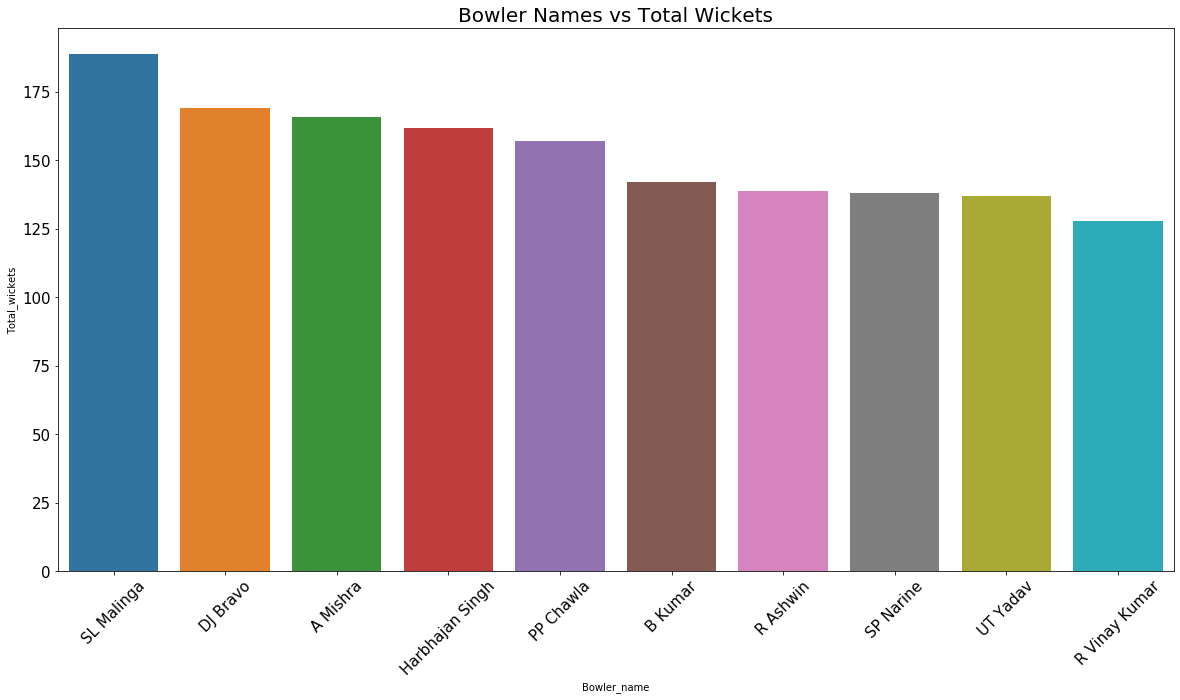

In [14]:
tw = bowler_data[:].sort_values(by='Total_wickets',ascending=False)
bar_plot(tw,'Bowler_name','Total_wickets','Bowler Names vs Total Wickets')

## Top 10 Bowler who bowled wide balled max 

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


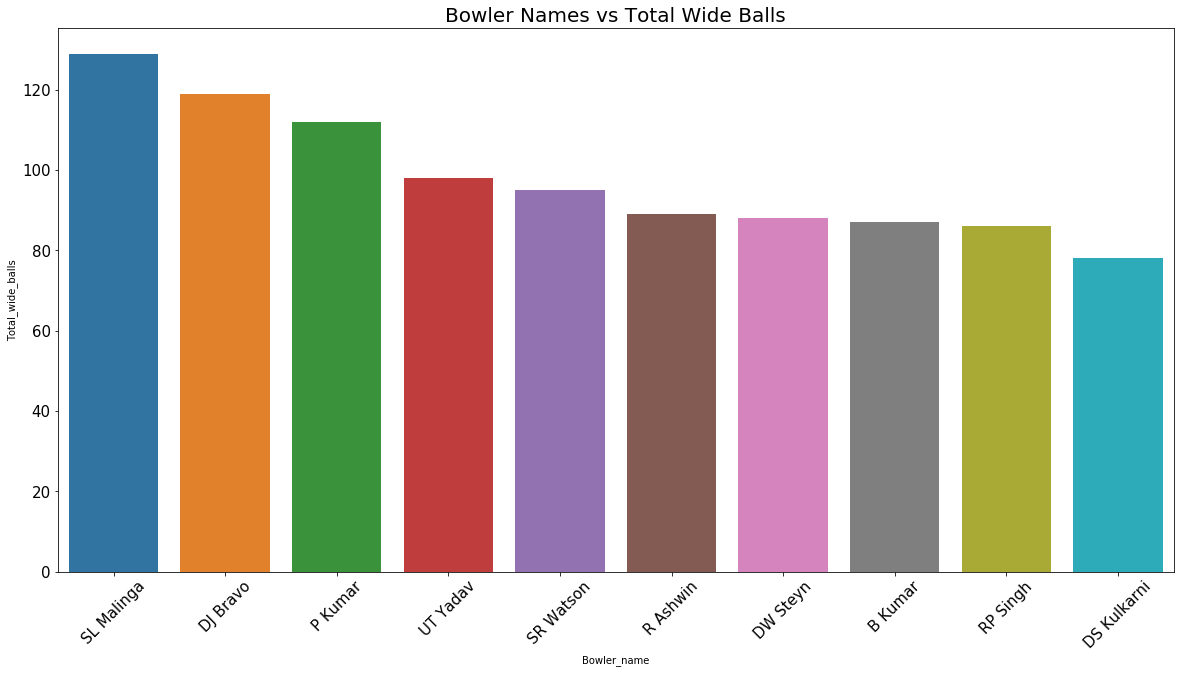

In [15]:
twb=bowler_data[:].sort_values(by='Total_wide_balls',ascending=False)
bar_plot(twb,'Bowler_name','Total_wide_balls','Bowler Names vs Total Wide Balls')

# Top 10 Bowler name who bowled no ball max 

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


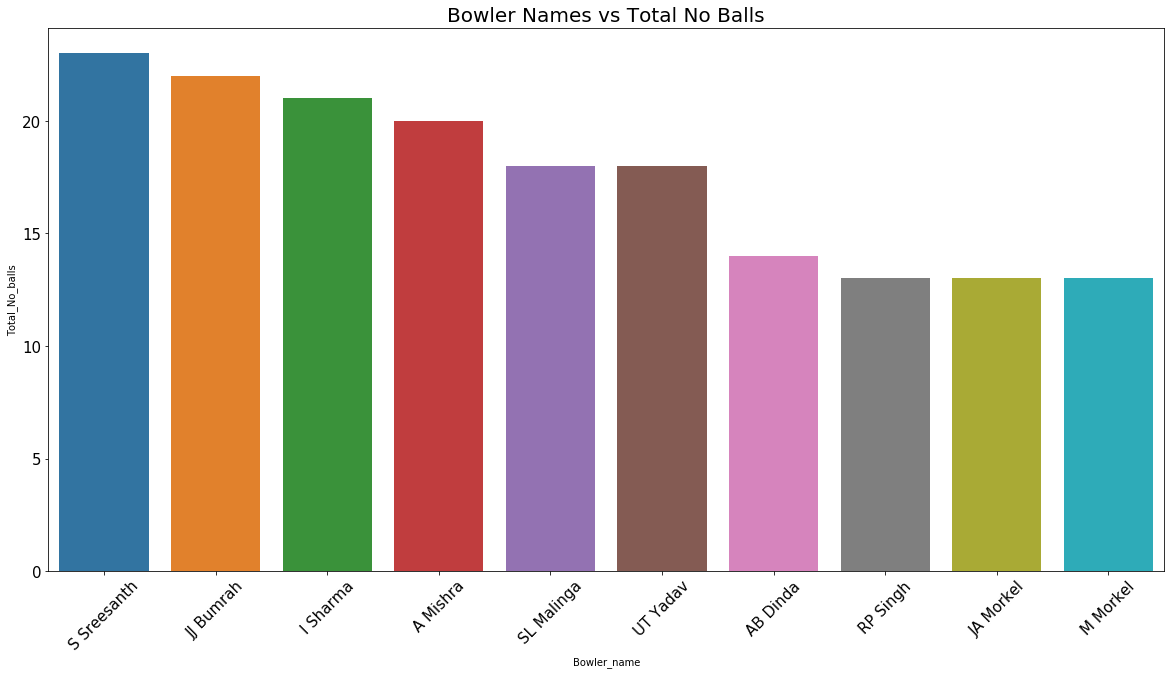

In [16]:
tnb=bowler_data[:].sort_values(by='Total_No_balls',ascending=False)
bar_plot(tnb,'Bowler_name','Total_No_balls','Bowler Names vs Total No Balls')

## Top 10 Bowlers and thier bowling average 

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


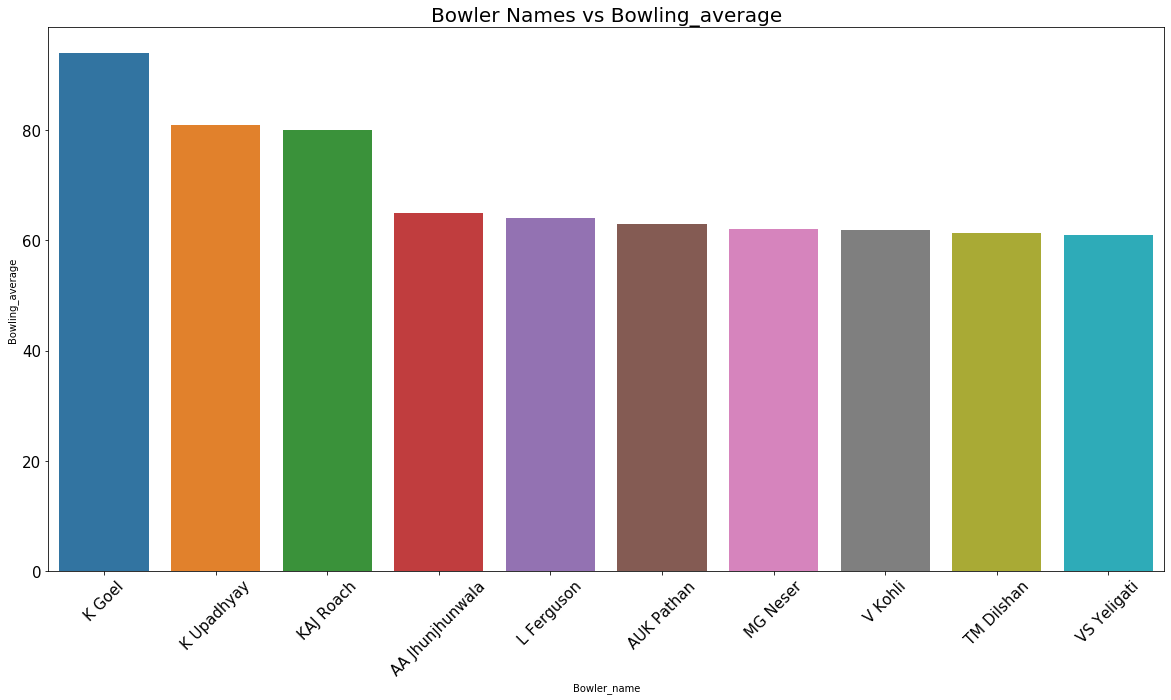

In [17]:
tba=bowler_data[:].sort_values(by='Bowling_average',ascending=False)
bar_plot(tba,'Bowler_name','Bowling_average','Bowler Names vs Bowling_average')

## Top 10 Bowler by thier Strike rate

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


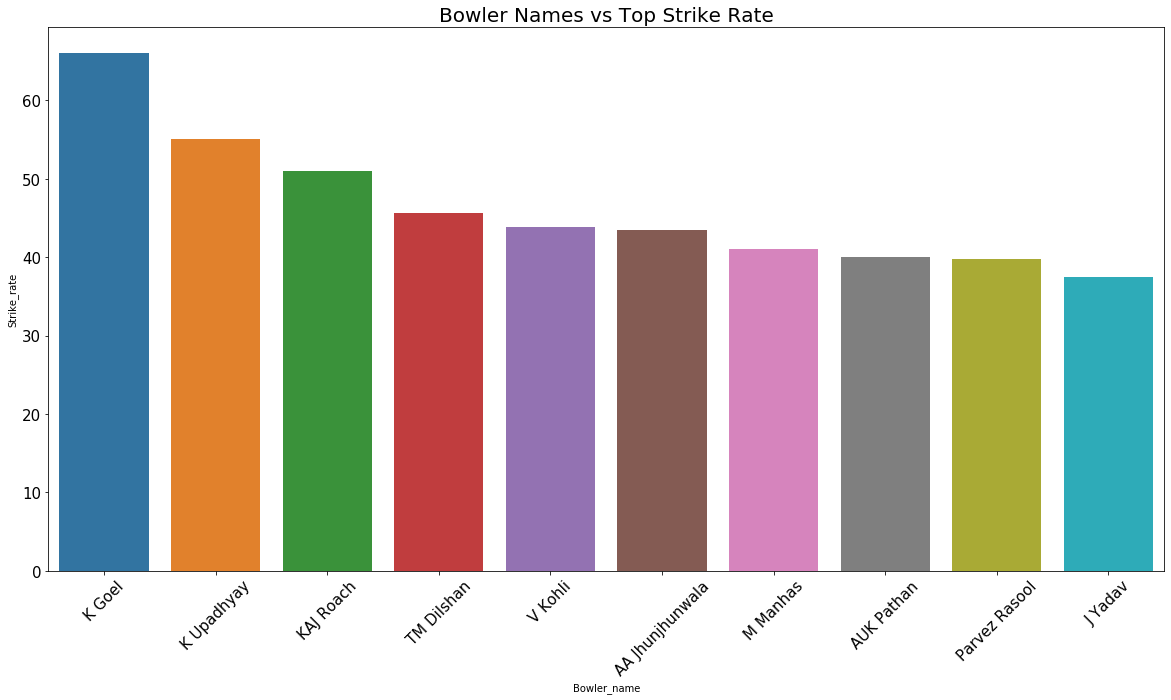

In [18]:
tsr=bowler_data[:].sort_values(by='Strike_rate',ascending=False)
bar_plot(tsr,'Bowler_name','Strike_rate','Bowler Names vs Top Strike Rate')

## Top 10 Bowler by thier Economy rate

C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


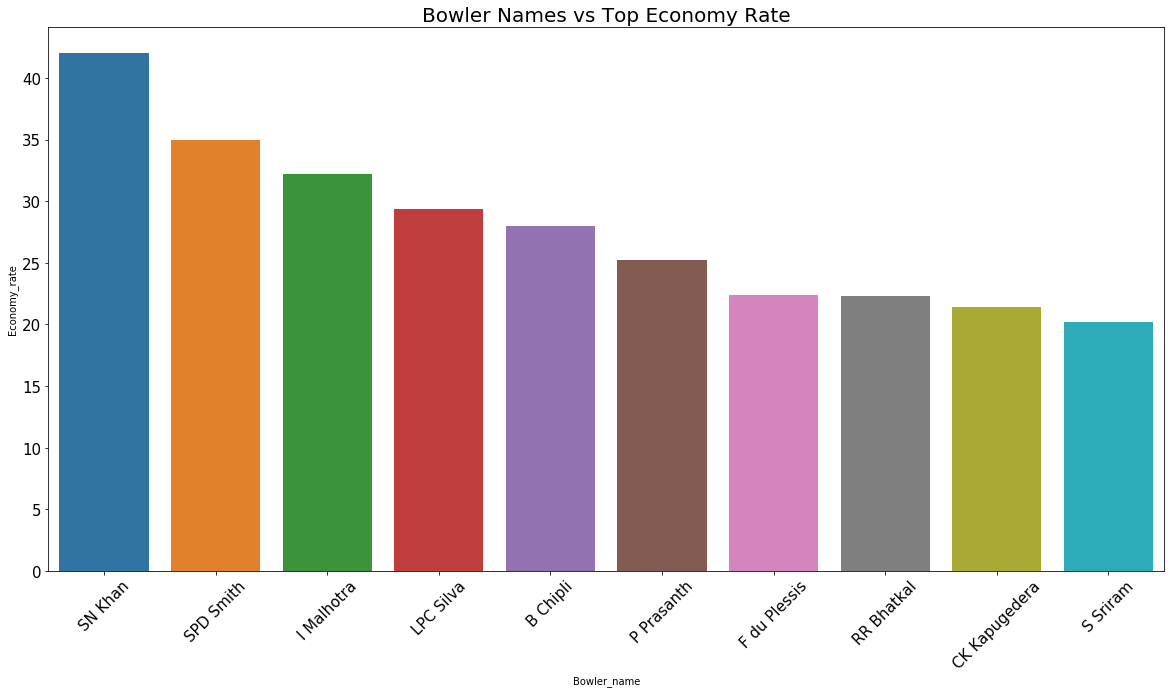

In [19]:
ter=bowler_data[:].sort_values(by='Economy_rate',ascending=False)
bar_plot(ter,'Bowler_name','Economy_rate','Bowler Names vs Top Economy Rate')

## Teams Number of matches win 

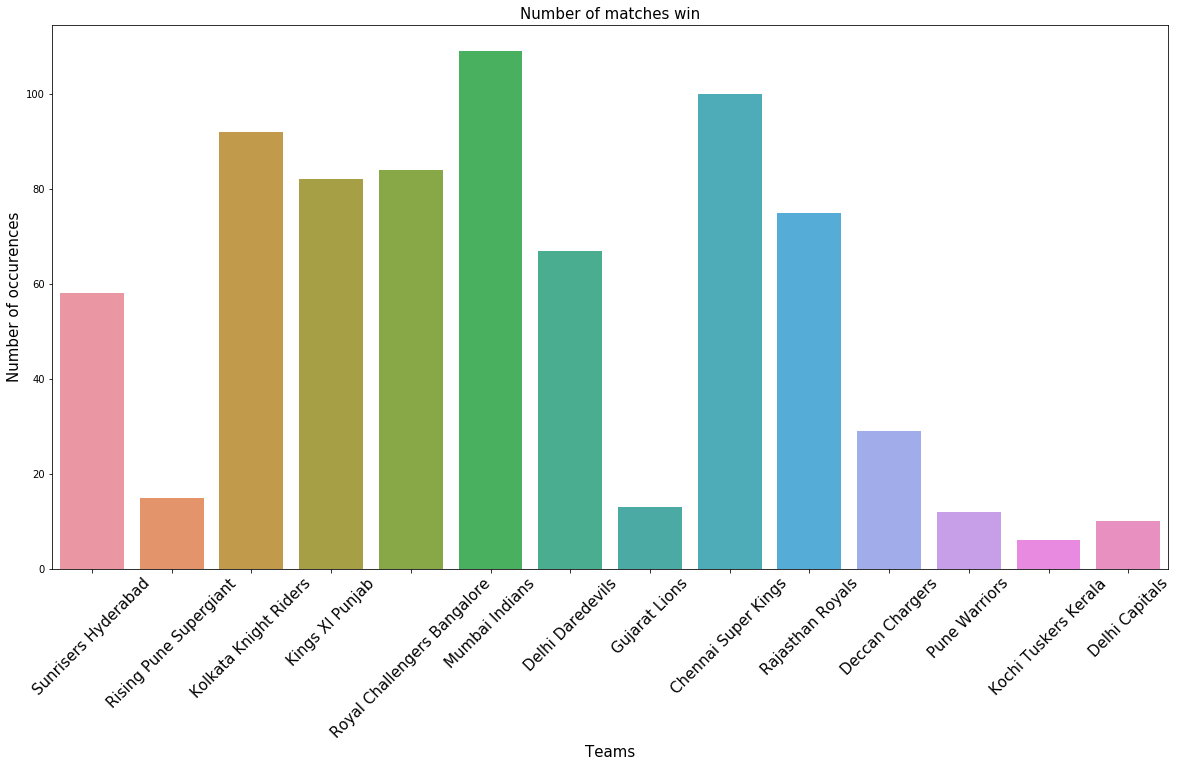

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="winner", data=ipl_match)
ax.set_title("Number of matches win",size = 15);
plt.xticks(rotation=45,size=15);
ax.set_xlabel('Teams',size = 15);
ax.set_ylabel('Number of occurences',size = 15);
plt.show()

## Top 10 Best Batsman runs

In [21]:
batsman_data = ipl_deliveries.groupby(['batsman']).sum().reset_index()


C:\Users\Pushkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


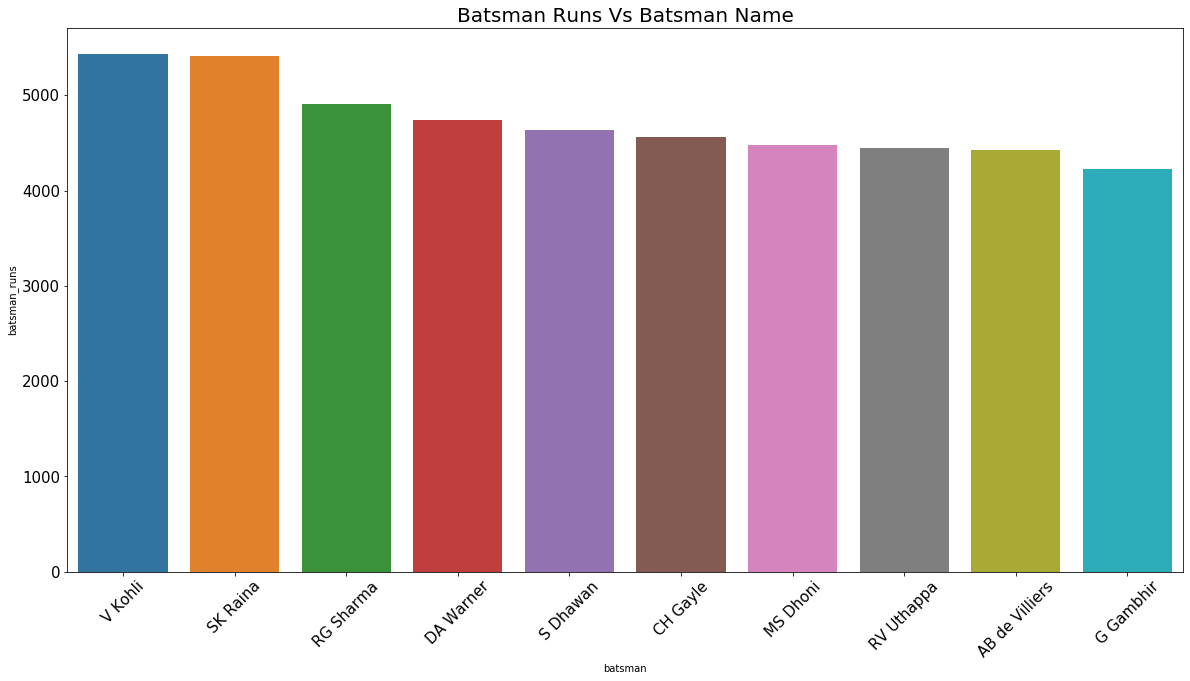

In [22]:
best_batsman=batsman_data[:].sort_values(by='batsman_runs',ascending=False)
bar_plot(best_batsman,'batsman','batsman_runs','Batsman Runs Vs Batsman Name')

## Top 10 Player Who Become Man Of The MAtch

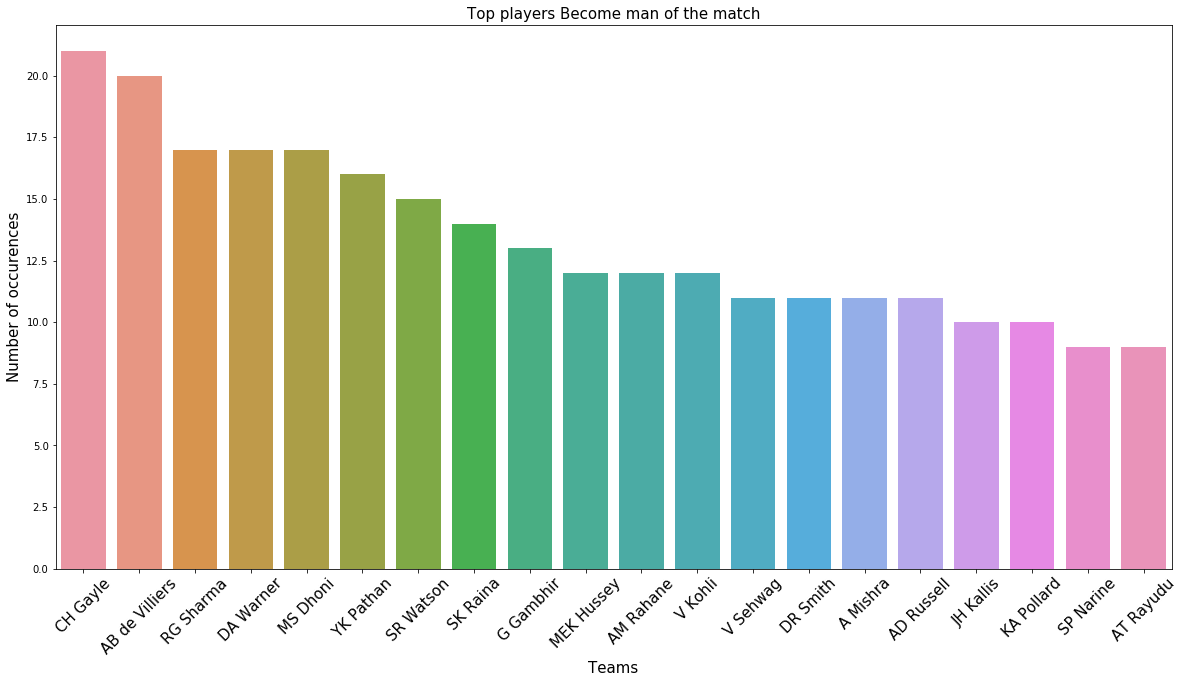

In [23]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="player_of_match", data=ipl_match ,order = ipl_match['player_of_match'].value_counts().index[:20:1])
ax.set_title("Top players Become man of the match",size = 15);
plt.xticks(rotation=45,size=15);
ax.set_xlabel('Teams',size = 15);
ax.set_ylabel('Number of occurences',size = 15);
plt.show()

## Model Building   

Convert categorical column to numerical 

In [24]:
ipl_match['toss_winner'] = pd.factorize(ipl_match["toss_winner"])[0]
ipl_match['city'] = pd.factorize(ipl_match["city"])[0]
ipl_match['team1'] = pd.factorize(ipl_match["team1"])[0]
ipl_match['team2'] = pd.factorize(ipl_match["team2"])[0]
ipl_match['toss_decision'] = pd.factorize(ipl_match["toss_decision"])[0]
ipl_match['result'] = pd.factorize(ipl_match["result"])[0]
ipl_match['winner'] = pd.factorize(ipl_match["winner"])[0]

## Randome Forest Classifier 

In [25]:
X=ipl_match.iloc[:,[2,4,5,6,7,8]].values
y=ipl_match.iloc[:,10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score, f1_score
print("random_forest_classifier")
print("Accuracy score : ",accuracy_score(y_pred, y_test))
print("F1_Score : ", f1_score(y_pred, y_test, average='micro'))

random_forest_classifier
Accuracy score :  0.4713656387665198
F1_Score :  0.4713656387665198


C:\Users\Pushkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## DecisionTree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("decision_tree_classifier")
print("Accuracy score : ",accuracy_score(y_pred, y_test))
print("F1_Score : ", f1_score(y_pred, y_test, average='micro'))

decision_tree_classifier
Accuracy score :  0.4801762114537445
F1_Score :  0.4801762114537445


## XGBClassifier

In [27]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("xgboost_classifier")
print("Accuracy score : ",accuracy_score(y_pred, y_test))
print("F1_Score : ", f1_score(y_pred, y_test, average='micro'))


C:\Users\Pushkar\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost_classifier
Accuracy score :  0.5374449339207048
F1_Score :  0.5374449339207048


## KNN Classifier 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("KNN_classifier")
print("Accuracy score : ",accuracy_score(y_pred, y_test))
print("F1_Score : ", f1_score(y_pred, y_test, average='micro'))

KNN_classifier
Accuracy score :  0.3920704845814978
F1_Score :  0.3920704845814978
